# 🏦 Task 4: Loan Approval Prediction

## 📌 Project Overview
The goal of this project is to build a **binary classification model** to predict whether a **loan application will be approved** based on applicant information, financial details, and credit history.

### **Objectives**
- Perform **data cleaning** (handle missing values).
- Encode **categorical variables** into numerical format.
- Train and evaluate **classification models** (Logistic Regression and Decision Tree).
- Handle **imbalanced data** using techniques like **SMOTE**.
- Evaluate models using **precision, recall, and F1-score** (focus on minimizing false approvals).

### **Dataset**
The dataset contains information such as:
- **Applicant income, loan amount, credit history, marital status, and education.**
- **Target variable:** Loan_Status (1 = Approved, 0 = Not Approved).


## Required Imports

In [1]:
!pip install scikit-learn==1.4.2 imbalanced-learn==0.12.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter

In [3]:
import warnings
warnings.filterwarnings('ignore')

##  Load and Explore Dataset

In [4]:
df = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## 🔍 Data Preprocessing and Visualization

As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.

In [7]:
df.drop(columns = ['loan_id'] , inplace=True)
df.head(10)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


## Strip Extra Spaces

In [8]:
df.columns = df.columns.str.strip()

## Check missing values

In [9]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

## Get the number of columns of object datatype.

In [10]:
obj = (df.dtypes == 'object')
obj_cols = list(obj[obj].index)
print("Categorical variables:",obj_cols)

Categorical variables: ['education', 'self_employed', 'loan_status']


Visualize all the unique values in columns using barplot. This will simply show which value is dominating as per our dataset.

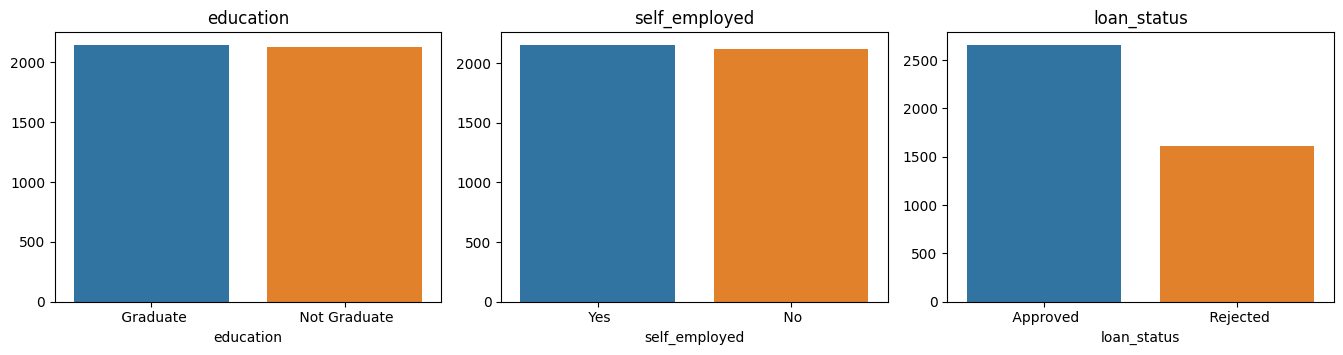

In [11]:
plt.figure(figsize=(18, 36))

for i, col in enumerate(obj_cols, 1):  
    y = df[col].value_counts()
    plt.subplot(11, 4, i)
    sns.barplot(x=y.index, y=y.values)
    plt.title(col)

plt.tight_layout()
plt.show()

## 🔤 Encode Categorical Features

### **Why Encoding is Needed?**
Most machine learning algorithms require numerical input.  
Categorical features such as `education`,`self_employed` and `loan_status` need to be transformed into numerical values to be used effectively by the model.

### **Approach Used:**
- **Label Encoding:**  
  Applied when a categorical feature has only two classes (e.g., `Yes/No` or `Approved/Rejected`).  
  Example: `eduaction` → {`Graduate`: 1, `Not Graduate`: 0}. Which Is our Case!

In [12]:
for col in list(obj[obj].index):
    df[col] = LabelEncoder().fit_transform(df[col])

df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


Again check the object datatype columns. Let's find out if there is still any left.

In [13]:
obj = (df.dtypes == 'object')
obj_cols = list(obj[obj].index)
print("Categorical variables:",len(obj_cols))

Categorical variables: 0


In [14]:
correlation = df.corr()
correlation

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
no_of_dependents,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.018114
education,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424,0.004918
self_employed,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,-0.000345
income_annum,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.015189
loan_amount,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,-0.016150
loan_term,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,0.113036
cibil_score,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.770518
residential_assets_value,0.007376,-0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.014367
commercial_assets_value,-0.001531,0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.008246
luxury_assets_value,0.002817,-0.012471,0.004413,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,0.015465


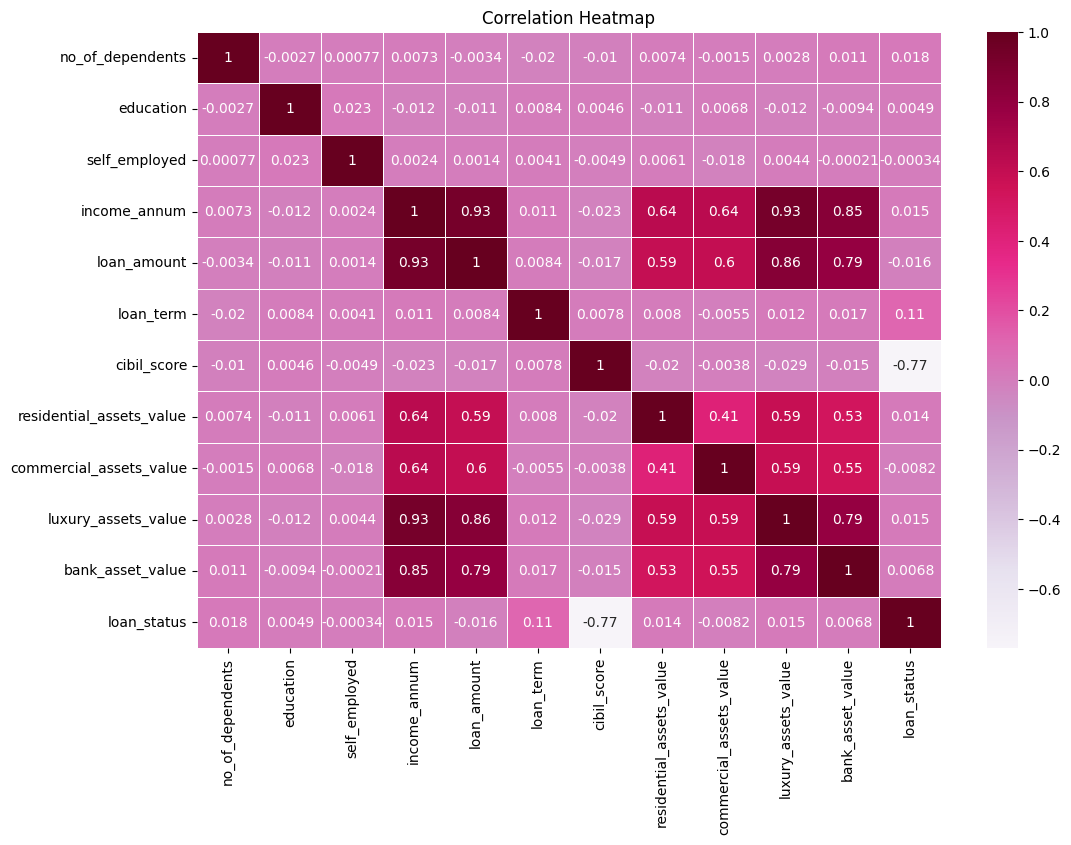

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='PuRd' , linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The above heatmap is showing the correlation between Loan status and loan term. 

 ## Split Dataset

In [16]:
# Split features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ⚖️ Handle Imbalanced Data with SMOTE

In [18]:
sm = SMOTE(random_state = 42)
X_train_sampled , y_train_sampled = sm.fit_resample(X_train , y_train)

Class distribution before SMOTE: Counter({0: 2656, 1: 1613})
Class distribution after SMOTE: Counter({0: 2120, 1: 2120})


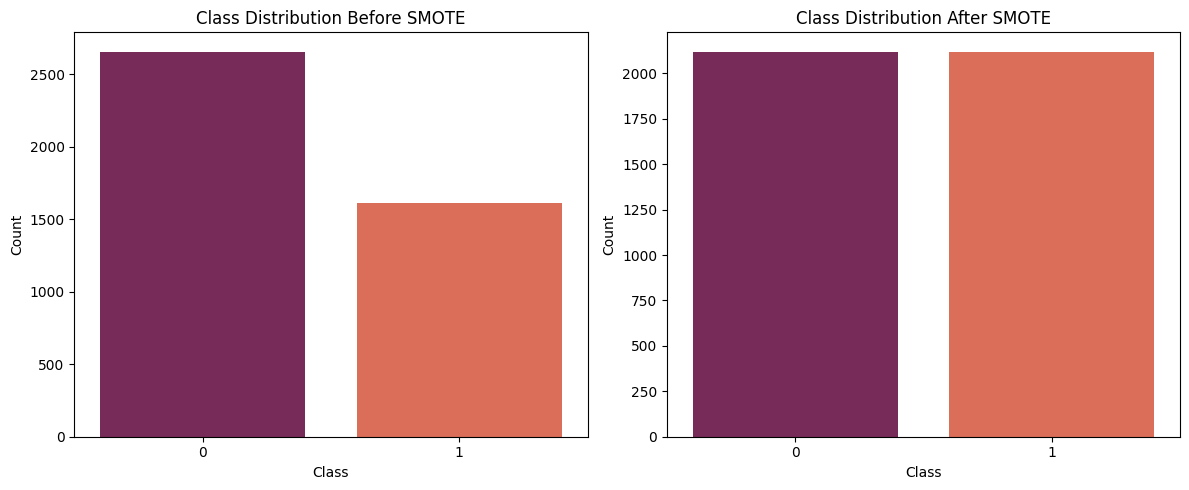

In [19]:
# Class distribution
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y_train_sampled))

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.countplot(x=y, palette="rocket", ax=axes[0])
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# After SMOTE
sns.countplot(x=y_train_sampled, palette="rocket", ax=axes[1])
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

## 🤖 Train Models

In [20]:
# Logistic Regression
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train_sampled , y_train_sampled)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_sampled , y_train_sampled)

DecisionTreeClassifier(random_state=42)

## 📈 Evaluate Models


Evaluation for Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       536
           1       0.72      0.68      0.70       318

    accuracy                           0.78       854
   macro avg       0.77      0.76      0.77       854
weighted avg       0.78      0.78      0.78       854



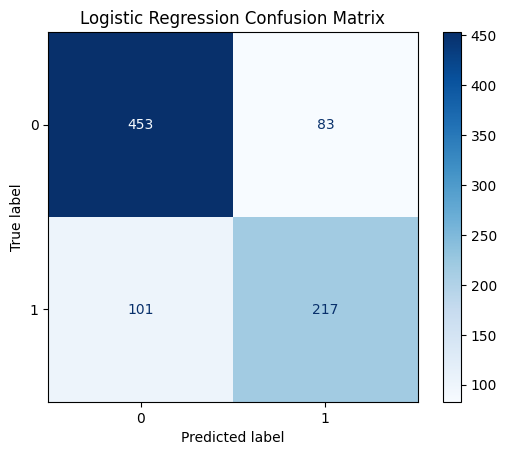


Evaluation for Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.96      0.96      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



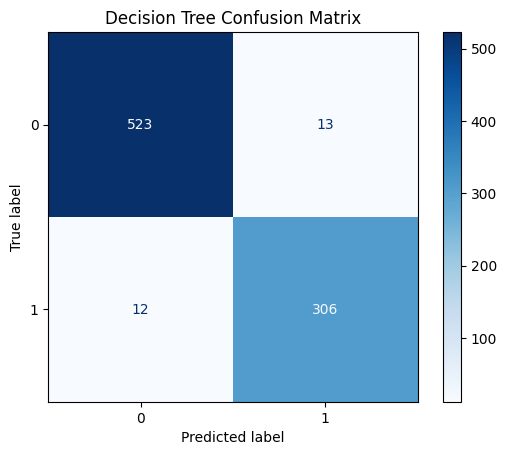

In [21]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\nEvaluation for {name}")
    print(classification_report(y_test, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix")
    plt.show()


evaluate_model(log_model, X_test, y_test, "Logistic Regression")
evaluate_model(tree_model, X_test, y_test, "Decision Tree")

In [22]:
y_pred_log = log_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Logistic Regression": [
        accuracy_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_log)
    ],
    "Decision Tree": [
        accuracy_score(y_test, y_pred_tree),
        precision_score(y_test, y_pred_tree),
        recall_score(y_test, y_pred_tree),
        f1_score(y_test, y_pred_tree)
    ]
})

print(results)


      Metric  Logistic Regression  Decision Tree
0   Accuracy             0.784543       0.970726
1  Precision             0.723333       0.959248
2     Recall             0.682390       0.962264
3   F1 Score             0.702265       0.960754
